# **ASSIGNMENT 2 - EMPIRICAL STUDY OF CLASSIFICATION PROBLEM**

# 1. Group Description
Group Number:[add this later] <br>
Names: Natasha Hussain | Daanish Khan <br>
Student Numbers: 300122562 | 300126840 <br>

# 2. The Classification Problem
[WRITE A DESCRIPTION]

# 3. The Dataset
In this assignment, we used WineQT.csv from : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
This dataset of wine samples has :
Number of samples: 4898, Number of attributes: 11, Number of classes: 11 (0 to 10)


In [23]:
# Importing libraries we will use throughout the assignment
import pandas as pd
import itertools
import numpy as np

#importing the wine quality dataset
url = 'https://raw.githubusercontent.com/NatashaNaima/AI-NaiveBayes/main/WineQT.csv'
dataset = pd.read_csv(url)

dataset.columns
# a small set to reduce literal runtime while testing
small_set = dataset.head(10)

# Turning each column of our table into an array for ease of access
fixed_acidity = dataset['fixed acidity'].tolist()
volatile_acidity = dataset['volatile acidity'].tolist()
citric_acid = dataset['citric acid'].tolist()
residual_sugar = dataset['residual sugar'].tolist()
chlorides = dataset['chlorides'].tolist()
free_sulfur_dioxide = dataset['free sulfur dioxide'].tolist()
total_sulfur_dioxide = dataset['total sulfur dioxide'].tolist()
density = dataset['density'].tolist()
pH = dataset['pH'].tolist()
sulphates = dataset['sulphates'].tolist()
alcohol = dataset['alcohol'].tolist()
quality = dataset['quality'].tolist()
Id = dataset['Id'].tolist()


[More Questions on the dataset that would use the arrays]
Think about the features that could be useful for this task, are they all present in the
dataset? Anything missing? Any feature provided that doesn’t seem useful to you?
Do you have the domain expertise to answer these questions? If you don't, think of
ways to explore the attributes to establish whether they appear to influence the
classification.

The most important feature provided in our dataset is the 'quality' column. It is in accordance with this feature that we will classify the entries of our dataset and evaluate 'new' entries to our dataset. We are also provided, alongside ID which differentiates each entry, many other quantative entries about particular physical properties of each wine. We are not wine tasters nor manufacterers nor any specialist or enthusiasts about wine, so we do not entirely understand the relevancy of each of these features. With this in mind however, by the end of this assignment we hope to establish some trends and therefore influences of each of these features as to how they affect wine quality.

b. What are the ranges of each feature? Try to compare and visualize those ranges. We
discussed in class that attribute normalisation is often promoted as empirically
helping to improve performances. Do you think this would be useful for your study?
Quality : Ranges from 3 to 8 where each entry is a whole number
Alcohol : Ranges from 8.4 to 14.9 where each entry is a percentage to 1 significant digit (ex.12.3%)
Sulfates : Ranges from 0.33 to 2 where each entry is 2 significant digits (ex.1.23)
pH : Ranges from 2.74 to 4.01 where each entry is 2 significant digits (ex.3.22)
density : Ranges from 0.99 to 1 where each entry is at least 4 significant digits (ex.0.9902)
total sulfur dioxide : Ranges from 6 to 289 where every entry is a whole number
free sulfur : Ranges from 1 to 68 where each entry is a whole number
chloride : Ranges from 0.01 to 0.61 where each entry is at least 2 significant digits (ex. 0.07)
residual sugar : Ranges from 0.9 to 15.5 where each entry is 1 significant digit (ex 8.6)
citric acid : Ranges from 0 to 1 where each entry has 2 significant digits ( ex 0.27)
volatile acidity : Ranges from 0.12 to 1.58 where each entry has at least 2 significant digits
fixed acidity : Ranges from 4.6 to 15.9 where each entry has 1 significant digits (ex. 9.6)


# 4. Encoding the features
[As you will use models that need discrete or continuous attributes, think about data
encoding and transformation.]

## Encoding for Logistical Regression
Since all of our entries are numbers on a continuous scale, we do not need to encode them.

## Encoding for Naive Bayes
We saw in class that this classifier expects discrete attributes. But in scikit-
learn, there are several types of Naive Bayes classifiers, such as
CategoricalNB and GaussianNB. The CategoricalNB matches what we saw in
class (and includes an additional smoothing factor). But there is also
GaussianNB which assumes a Gaussian distribution on continuous attributes.
Choose one of the two classifiers according to your data. You can also test
both (optional). [Make decision and change description accordingly] (We can probably go with Gaussian since our dataset is continuous)

In [ ]:
# Code block for Naive Bayes encoding

# 5. Defining Logistical Regression and Naive-Bayes Model

## Logistical Regression
[write some description]

In [ ]:
# Code block for logistical regression model

## Naive-Bayes
[Write some description]

Accuracy: 0.5476190476190477
F1 Score: 0.5442532802594723


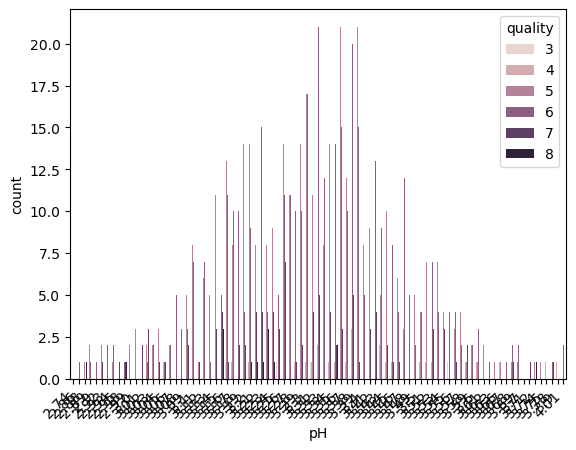

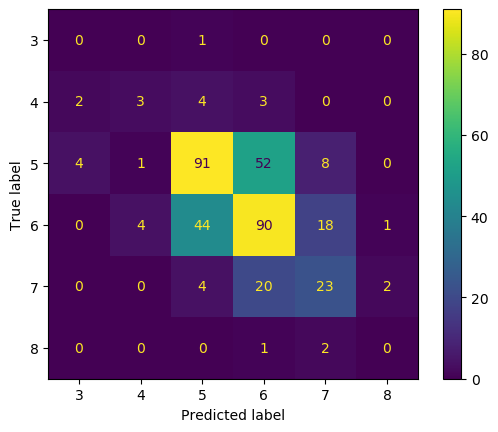

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

sns.countplot(data=dataset, x='pH', hue='quality')
plt.xticks(rotation=45, ha='right')

X = dataset.drop('quality', axis=1)
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.33, 
    random_state = 125
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

labels = [3,4,5,6,7,8]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

# 6. Evaluating our Models

## 4-fold cross validation
We will use 4-fold cross validation to evaluate our models. [write short description of 4-fold cross]

In [ ]:
# Code Block for 4-fold cross validation

## Performing evaluation with precision/recall measures
[Perform an evaluation with precision/recall measures. Since you are looking at a
multi-class problem, make sure that you compare micro and macro averages on
precision and recall]
[Make sure to note parameters used in here]

In [ ]:
# Code block for using 4-fold cross validation on naive bayes and log.rg.

# 7. Modifying Parameters
[State what parameters are modified in the following code cells.]

In [ ]:
# Code cell for first log.reg. call 

In [ ]:
# Code Cell for second log.reg. call

In [ ]:
# Code Cell for first naive bayes

In [ ]:
# code cell for second naive bayes

# 8. Analysis
[Compare quantitatively (with the precision/recall measures) your 6 results. Your 6
results should use the same cross-validation technique (same k). The 6 results come
from 2 models, each with default parameters from step 5 + 2 variations from step 6.
Make sure to show your tests in cells. If you change a parameter, create a new cell
and test. If you are making graphs for visualization, the values should not be
"hardcoded".]

[b. As was mentioned before, since you are looking at a multi-class problem, make sure
that you compare with micro and macro averages on precision and recall. Discuss
the differences (if any) obtained]

# 9. References:
1. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn